In [285]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression

In [286]:
df = pd.read_csv('./output/v1.csv', index_col=0)
df.head()

,date,quantity,suppliers_currency,transformer_unit_price,dry_or_oil,rated_power_kVA,primary_winding,secondary_winding,no_load_loss,full_load_loss_75,full_load_loss_120,rated_volt_primary_side
0,2021-04-28,6.0,EUR,708000.0,Oil,19080.0,Copper,NaN,NaN,NaN,NaN,33000.0
1,2021-04-22,1.0,NaN,NaN,Oil,19080.0,Copper,NaN,17000.0,90000.0,NaN,33750.0
2,2021-04-22,NaN,NaN,NaN,Oil,19080.0,Copper,Copper,17000.0,90000.0,NaN,33750.0
3,2023-03-14,4.0,EUR,235000.0,Oil,11000.0,Copper,Copper,NaN,NaN,NaN,NaN
4,2023-03-14,NaN,NaN,NaN,Oil,11000.0,Copper,NaN,7800.0,88000.0,NaN,22000.0


In [287]:
df = df.dropna(subset=['transformer_unit_price']).copy()
df = df.loc[df['no_load_loss'].apply(lambda x: x<50000 or pd.isna(x))].copy()
df['suppliers_currency'] = ['EUR']*df.shape[0]

In [288]:
df.isna().sum()

date                        0
quantity                    0
suppliers_currency          0
transformer_unit_price      0
dry_or_oil                  9
rated_power_kVA             7
primary_winding             4
secondary_winding           5
no_load_loss               31
full_load_loss_75          53
full_load_loss_120         61
rated_volt_primary_side    19
dtype: int64

In [289]:
dry_or_oil_dict = df.groupby('primary_winding')['dry_or_oil'].aggregate(pd.Series.mode).to_dict()
dry_or_oil = []
for val, primary_winding in zip(df['dry_or_oil'], df['primary_winding']):
    if val and not pd.isna(val):
        dry_or_oil.append(val)
    else:
        dry_or_oil.append(dry_or_oil_dict.get(primary_winding, None))
df['dry_or_oil'] = dry_or_oil

In [290]:
primary_winding_dict = df.groupby('dry_or_oil')['primary_winding'].aggregate(pd.Series.mode).to_dict()
primary_winding = []
for val, dry_or_oil in zip(df['primary_winding'], df['dry_or_oil']):
    if val and not pd.isna(val):
        primary_winding.append(val)
    else:
        primary_winding.append(primary_winding_dict.get(dry_or_oil, None))
df['primary_winding'] = primary_winding

In [291]:
secondary_winding_dict = df.groupby('dry_or_oil')['secondary_winding'].aggregate(pd.Series.mode).to_dict()
secondary_winding = []
for val, dry_or_oil in zip(df['secondary_winding'], df['dry_or_oil']):
    if val and not pd.isna(val):
        secondary_winding.append(val)
    else:
        secondary_winding.append(secondary_winding_dict.get(dry_or_oil, None))
df['secondary_winding'] = secondary_winding

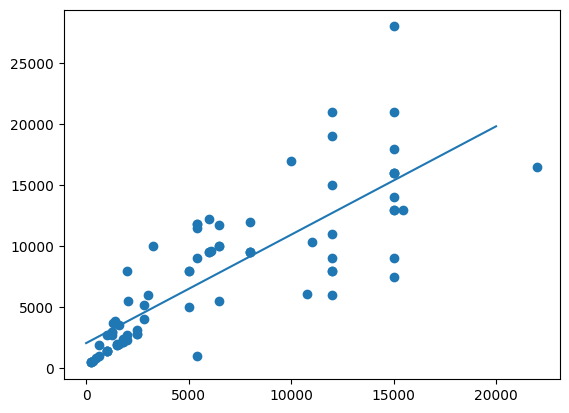

In [292]:
subset = df[['rated_power_kVA', 'no_load_loss']].dropna().copy()
X = subset[['rated_power_kVA']]
y = list(subset['no_load_loss'])

lm = LinearRegression()
lm.fit(X, y)

y_pred_mesh = lm.predict(
    pd.DataFrame({'rated_power_kVA': np.linspace(1, 20000)})
)

plt.scatter(
    df['rated_power_kVA'],
    df['no_load_loss']
)
plt.plot(
    np.linspace(1, 20000),
    y_pred_mesh
)
plt.show()

no_load_loss = []
for val, rated_power in zip(df['no_load_loss'], df['rated_power_kVA']):
    if val and not pd.isna(val):
        no_load_loss.append(val)
    elif not pd.isna(rated_power):
        pred = lm.predict(
            pd.DataFrame({'rated_power_kVA': [rated_power]})
        )
        no_load_loss.append(pred[0])
    else:
        no_load_loss.append(None)
df['no_load_loss'] = no_load_loss

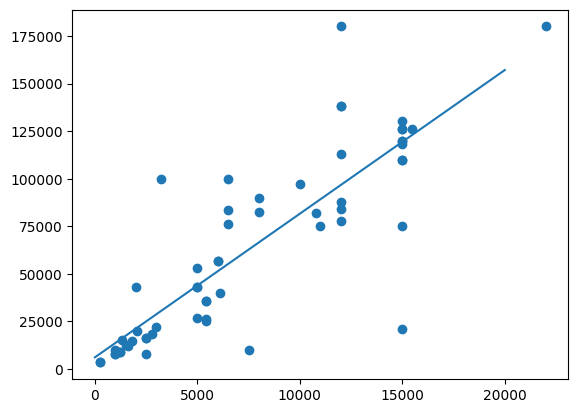

In [293]:
from sklearn.linear_model import LinearRegression

subset = df[['rated_power_kVA', 'full_load_loss_75']].dropna().copy()
X = subset[['rated_power_kVA']]
y = list(subset['full_load_loss_75'])

lm = LinearRegression()
lm.fit(X, y)

y_pred_mesh = lm.predict(
    pd.DataFrame({'rated_power_kVA': np.linspace(1, 20000)})
)

plt.scatter(
    df['rated_power_kVA'],
    df['full_load_loss_75']
)
plt.plot(
    np.linspace(1, 20000),
    y_pred_mesh
)
plt.show()

full_load_loss_75 = []
for val, rated_power in zip(df['full_load_loss_75'], df['rated_power_kVA']):
    if val and not pd.isna(val):
        full_load_loss_75.append(val)
    elif not pd.isna(rated_power):
        pred = lm.predict(
            pd.DataFrame({'rated_power_kVA': [rated_power]})
        )
        full_load_loss_75.append(pred[0])
    else:
        full_load_loss_75.append(None)
df['full_load_loss_75'] = full_load_loss_75

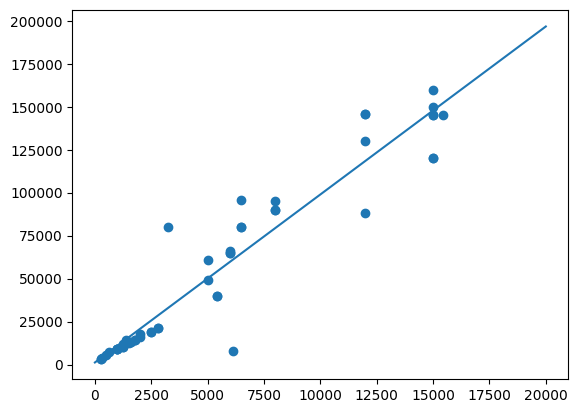

In [294]:
from sklearn.linear_model import LinearRegression

subset = df[['rated_power_kVA', 'full_load_loss_120']].dropna().copy()
X = subset[['rated_power_kVA']]
y = list(subset['full_load_loss_120'])

lm = LinearRegression()
lm.fit(X, y)

y_pred_mesh = lm.predict(
    pd.DataFrame({'rated_power_kVA': np.linspace(1, 20000)})
)

plt.scatter(
    df['rated_power_kVA'],
    df['full_load_loss_120']
)
plt.plot(
    np.linspace(1, 20000),
    y_pred_mesh
)
plt.show()

full_load_loss_120 = []
for val, rated_power in zip(df['full_load_loss_120'], df['rated_power_kVA']):
    if val and not pd.isna(val):
        full_load_loss_120.append(val)
    elif not pd.isna(rated_power):
        pred = lm.predict(
            pd.DataFrame({'rated_power_kVA': [rated_power]})
        )
        full_load_loss_120.append(pred[0])
    else:
        full_load_loss_120.append(None)
df['full_load_loss_120'] = full_load_loss_120

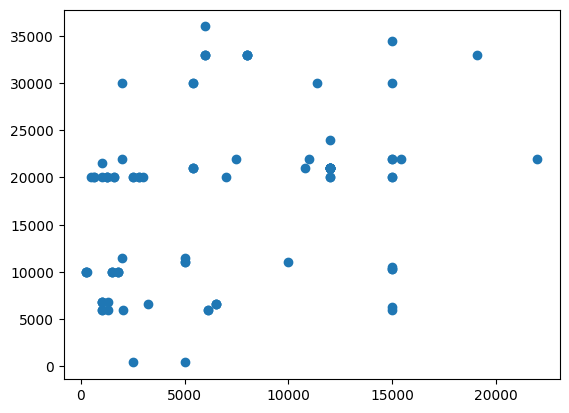

In [295]:
plt.scatter(
    df['rated_power_kVA'],
    df['rated_volt_primary_side']
)

In [302]:
rated_volt_primary_side = []
for val in df['rated_volt_primary_side']:
    if val and not pd.isna(val):
        rated_volt_primary_side.append(val)
    else:
        rated_volt_primary_side.append(df['rated_volt_primary_side'].median())
df['rated_volt_primary_side'] = rated_volt_primary_side

In [304]:
df.isna().sum()

date                       0
quantity                   0
suppliers_currency         0
transformer_unit_price     0
dry_or_oil                 1
rated_power_kVA            7
primary_winding            1
secondary_winding          1
no_load_loss               7
full_load_loss_75          7
full_load_loss_120         7
rated_volt_primary_side    0
dtype: int64

In [307]:
df = df.dropna().copy()

In [308]:
df.to_csv('./output/v2.csv')